# Shedding Light on the Dark: Analyzing the Proportion of Nighttime Thefts in Vancouver

Group 2: Rui Xiang Yu, Lily Zhang, Bill Makwae & Ruoxi Chen

### 1. Introduction
Vancouver's population was reported to be 662,248 in 2021, making it one of the biggest cities in Canada (Statistics Canada, 2023). As such, it is expected for crimes, such as theft, to happen. 

With this project, we aim to answer the following inferential question: was the proportion of theft-related crimes committed during the night higher than 50% in Vancouver in 2022? Once obtained the proportion of night thefts, the proportion of day thefts could be derived and thus, determine whether thefts happen more at night or day. The conclusions from this project could be extrapolated to the entirety of Vancouver and other Canadian cities of similar population density.

It was found that predicted robbery rates in the United Kingdom increased the darker the areas were (Tompson & Bowers, 2013). Furthermore, commercial robberies in the Netherlands happened more during winter due to more dark hours during the season (Van Koppen & Jansen, 1999). Based on the current literature, our hypothesis is that the proportion of theft is higher at night, thus, proportion of night thefts is bigger than 50%.

The dataset used for this project is the Vancouver Police Department's Crime Data, which contains the data about most crimes committed in Vancouver such as when they happened, where they happened, and what type of crime it was(Vancouver Police Department, 2023). For the purpose of this project, only crimes that occured in 2022 will be explored, as it is the most recent year. The dataset contains the information of 34203 crimes, but when filtered for theft only crimes, it becomes 20431 crimes.

The variables "hour" and "number of crimes" will be used. Since the main focus is the count of crimes committed on at night, the proportion of night crimes will be studied. Furthermore, the standard deviation will be studied too in order to report a confidence interval and study the spread of the distribution.

For the purpose of this project, daytime is defined as the time between 6 am (inclusive) and 18 pm, and nighttime between 18 pm (inclusive) and 6 am. The overall proportion of day VS night crimes will be studied, which means it is not a comparison per year or per day.

### 2. Methods and Results

#### 2.1. Preliminary Results

Firstly, the dataset is loaded and tidied to include only the necessary columns.

In [1]:
#Loading all necessary libraries.
library(dplyr)
library(ggplot2)
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#Reading the dataset from the web into Jupyter and previewing the first 6 rows.
vancouver_crime_data <- read.csv(url("https://raw.githubusercontent.com/xnrxng/stat201project/main/crimedata_csv_AllNeighbourhoods_2022.csv"))
head(vancouver_crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2022,1,3,16,19,10XX ALBERNI ST,West End,491036.1,5459146
2,Break and Enter Commercial,2022,6,17,5,16,10XX ALBERNI ST,West End,491067.3,5459115
3,Break and Enter Commercial,2022,3,15,5,14,10XX ALBERNI ST,West End,491102.2,5459092
4,Break and Enter Commercial,2022,3,19,6,42,10XX ALBERNI ST,West End,491102.2,5459092
5,Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
6,Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444


*Table 1.1. First six rows of the loaded Crime Dataset.*

In [3]:
#Printing total number of crimes that have happened in Vancouver.
cat("Number of Crimes: ", nrow(vancouver_crime_data))

Number of Crimes:  34203

In [4]:
#Selecting only theft-related crimes and mutating hours into "day" and "night". Crimes that happened
#between 6 am and 18 pm are considered "day" and the rest are considered "night". NA values are also
# filtered out. Lastly, only columns of interest are selected (day_night). Type and hour are also
# selected for graphing purposes.
vancouver_thefts <- vancouver_crime_data %>%
    filter(TYPE == "Other Theft" | TYPE == "Theft from Vehicle" | TYPE == "Theft of Vehicle" | TYPE == "Theft of Bicycle",
          !is.na(TYPE),
          !is.na(HOUR)) %>%
    mutate(DAY_NIGHT = ifelse(HOUR >= 6 & HOUR < 18, "DAY", "NIGHT")) %>%
    select(TYPE, HOUR, DAY_NIGHT)

#Previewing first six rows.
head(vancouver_thefts)

,TYPE,HOUR,DAY_NIGHT
,<chr>,<int>,<chr>
1,Other Theft,11,DAY
2,Other Theft,16,DAY
3,Other Theft,15,DAY
4,Other Theft,5,NIGHT
5,Other Theft,17,DAY
6,Other Theft,22,NIGHT


*Table 1.2. First six rows of the dataset with selected interested columns.*

In [5]:
#Obtaining the total number of crimes per type of theft-related crime.
theft_counts <- vancouver_thefts %>%
    group_by(TYPE) %>%
    summarise(COUNT = n())
theft_counts

TYPE,COUNT
<chr>,<int>
Other Theft,10738
Theft from Vehicle,7263
Theft of Bicycle,1518
Theft of Vehicle,912


*Table 1.3. Number of crimes per type of theft-related crime.*

As it is seen in this table, "Other Thefts" has the highest count while "Theft of Vehicle" has the smallest count. However, since all these four types will be grouped into one, we believe this difference in count will not affect our analysis.

In [6]:
#Obtaining the total number of crimes per type of theft-related crime and whether it is day or night.
# Also obtaining its proportion.
theft_counts_by_type <- vancouver_thefts %>%
  group_by(TYPE, DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
theft_counts_by_type

`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


TYPE,DAY_NIGHT,COUNT,PROP
<chr>,<chr>,<int>,<dbl>
Other Theft,DAY,6735,0.6272118
Other Theft,NIGHT,4003,0.3727882
Theft from Vehicle,DAY,2956,0.4069944
Theft from Vehicle,NIGHT,4307,0.5930056
Theft of Bicycle,DAY,815,0.5368906
Theft of Bicycle,NIGHT,703,0.4631094
Theft of Vehicle,DAY,407,0.4462719
Theft of Vehicle,NIGHT,505,0.5537281


*Table 1.4. Number and proportion of crimes that occured per theft-type and whether it was night or day.*

In [7]:
#Obtaining number of crimes that occur per hour of the day.
theft_counts_hour <- vancouver_thefts %>%
  group_by(HOUR) %>%
  summarise(COUNT = n())
head(theft_counts_hour)

HOUR,COUNT
<int>,<int>
0,1085
1,436
2,396
3,339
4,311
5,269


*Table 1.5. Number of theft crimes that occur per hour of the day.*

In [8]:
#Obtaining overall number of crimes that happen during the day vs night and their proportions.
theft_counts_by_day_night <- vancouver_thefts %>%
  group_by(DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
theft_counts_by_day_night

DAY_NIGHT,COUNT,PROP
<chr>,<int>,<dbl>
DAY,10913,0.5341393
NIGHT,9518,0.4658607


*Table 1.6. Table of estimates. Number and proportion of theft crimes in the day and in the night.*

In [9]:
# Obtaining observed proportion of night crimes.
obs_prop <- theft_counts_by_day_night$PROP[2]
obs_prop

[1] 0.4658607

In [10]:
# Obtaining the tidied dataset with ONLY the interested columns (day-night).
# This is the dataset that will be used during the analysis.
theft_tidy <- vancouver_thefts %>%
select(DAY_NIGHT)

#Previewing first 6 columns.
head(theft_tidy)

,DAY_NIGHT
,<chr>
1,DAY
2,DAY
3,DAY
4,NIGHT
5,DAY
6,NIGHT


*Table 1.7. Final tidy dataset with only column of interest "day_night".*

In [11]:
# Obtaining total number of theft related crimes.
n = theft_tidy%>%
nrow()

cat("Total Number of Thefts: ", n)

Total Number of Thefts:  20431

In [12]:
# Graphing a bar plot of the proportion of crimes based on theft-type and whether it is day or night.
theft_counts_by_type_plot <- theft_counts_by_type |>
  ggplot(aes(x=TYPE, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity", position="dodge") +
  labs(x="Type of Crime", y="Proportion of Crimes", fill="Day/Night") +
  ggtitle("Proportion of Crimes \nby Type and Day/Night") +
  theme(text = element_text(size=14)) +
theme(axis.text.x = element_text(angle = 9, hjust = 1, vjust = 0.5)) +
scale_fill_brewer(palette = "Set2")

#Graphing a histogram plot of the number of crimes that happen per each hour of the day.
theft_counts_hour_plot <- ggplot(theft_counts_hour, aes(x=HOUR, y=COUNT)) +
  geom_bar(stat="identity") +
  labs(x="Hour of Day (Shaded area indicates daytime)", y="Number of Crimes") +
  ggtitle("Distribution of Crimes by Hour of Day") +
  theme(text = element_text(size=20)) +
geom_vline(xintercept=6, color= "blue", linetype = "dashed", size = 1) +
geom_vline(xintercept=18, color= "blue", linetype = "dashed", size = 1) +
geom_rect(aes(xmin = 6, xmax = 18, ymin = 0, ymax = Inf), fill = "gray", alpha = 0.03)

#Graphing a bar plot of the proportion of crimes that happen in the day vs night.
theft_counts_by_day_night_plot <- 
  ggplot(theft_counts_by_day_night, aes(x=DAY_NIGHT, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity") +
  labs(x = "Daytime and Nighttime", y= "Proportion of Crimes", fill="Time of Day") +
  ggtitle("Proportion of Crimes by Time of Day") +
  theme(text = element_text(size=14)) +
scale_fill_brewer(palette = "Set2")

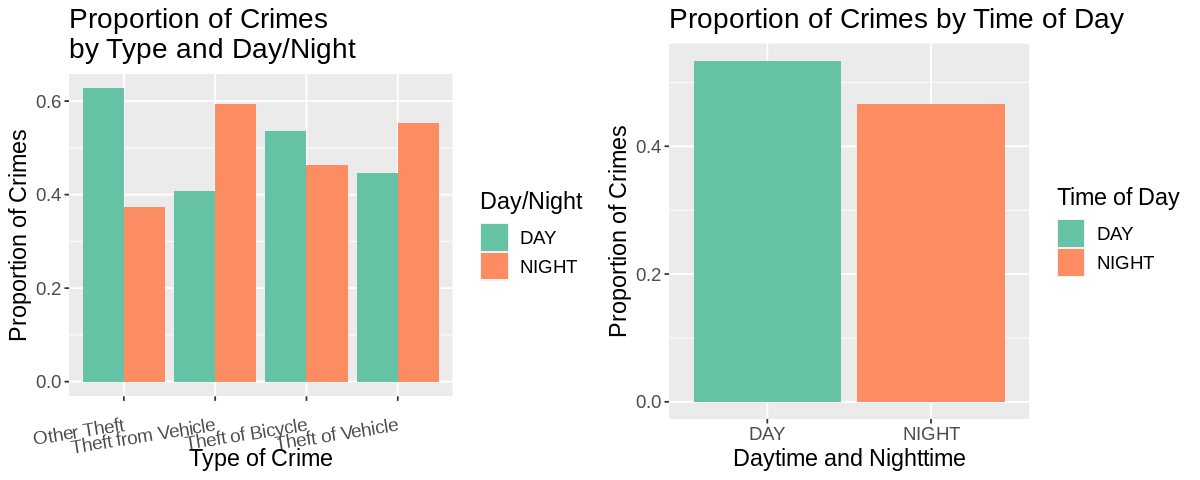

In [13]:
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(theft_counts_by_type_plot, theft_counts_by_day_night_plot, ncol = 2)

*Figure 1.1. Top left. Bar chart of the proportion of crimes per theft type and whether it was daytime or nighttime.*

*Figure 1.2. Top right. Bar chart of the proportion of theft-related crimes in the day vs in the night.*

In figure 1.1, it can be seen that theft from vehicle and theft of vehicle happen more at night, whereas theft of bicycle and other theft happen more during the day.

From figure 1.2, we can see that the proportion of theft crimes committed during the day is slightly higher than those committed during the night. 

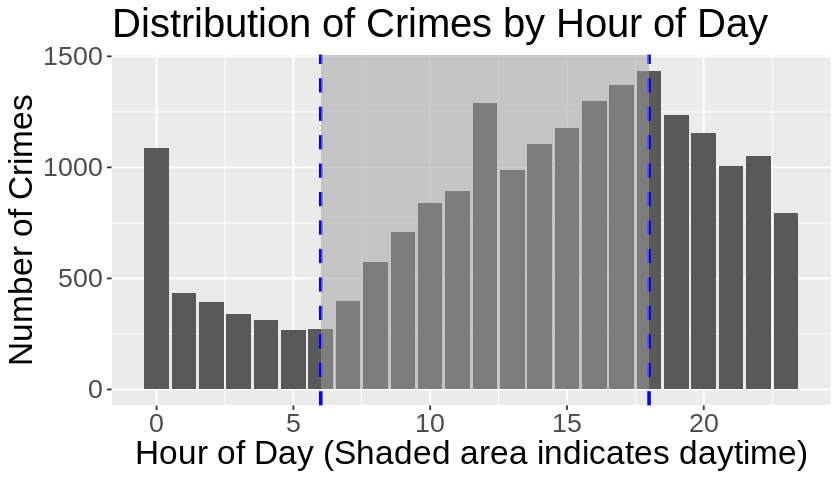

In [14]:
options(repr.plot.width = 7, repr.plot.height = 4)
theft_counts_hour_plot

*Figure 1.3. Histogram of number of crimes per hour of the day.*

In this plot, it can be seen that there is gradual increase in the number of crimes starting around 5-6 am (minimum) until 6 pm (peak). After 6 pm, the number of crimes gradually decreases until reaching the minimum at 5-6 am again.Thus, from this graph it can be seen that the shaded area (daytime) contains the most number of crimes.

The use of this data is supported by the reliability of the data source and standardized procedures for data collection completed by the Vancouver Police Department, ensuring accuracy and consistency in the classification of crimes and time of occurrence.

Due to privacy and investigative reasons, not all crime data is included in the dataset, so our current graphs do not have a complete picture of crime in Vancouver. And furthermore, we will use this data to infer the proportion of theft occurring during day and night in other Canadian cities of similar population density.

To perform our analysis, we will use $p$ to represent the proportion of theft that occurred at night. We will conduct a hypothesis test on the proportions at a significance level of 5%, with $H_0: p = 0.5$ (null hypothesis) and $H_a: p > 0.5$ (alternative hypothesis). In other words, our null hypothesis is that the proportion of theft occurring during the night is 0.5, while our alternative hypothesis is that the proportion occurring at night is higher than 0.5. And we will conduct hypothesis testing using both bootstrapping and theory-based methods. Additionally, we will construct a 95% confidence interval using the standard deviation found through bootstrapping. Once the proportion of night crimes has been found, the proportion of day crimes can be estimated.

We are expecting to find less proportion of theft during the day than the night for this report. By obtaining the result, we can raise people's awareness of the time of occurrences of theft in Canada with the support of data. And for later investigation, we would like to suggest analyzing other categories of crime and the time of occurrence to see whether all crimes share similar nature in the time of occurrence.

#### 2.2. Bootstrapping method

We first code the null distribution and find the p-value. The type specified is "draw" instead of "bootstrap" because with "draw" the correct null distribution centered at 0.5 is obtained (with "bootstrap" a distribution centered at 0.465 is obtained).

In [15]:
set.seed(2023)

#Obtaining a null distribution where p_hat = 0.5.
null_dist <- theft_tidy %>% 
specify(response = DAY_NIGHT, success = "NIGHT") %>% 
hypothesize(null = "point", p = 0.5) %>% 
generate(reps = 1000, type = "draw") %>% 
calculate(stat = "prop")

# Previewing first six rows of the null distribution.
head(null_dist)

replicate,stat
<fct>,<dbl>
1,0.5058000
2,0.4998776
3,0.4952768
4,0.5037443
5,0.4956683
6,0.4928295


*Table 2.1. Null distribution.*

In [16]:
# Obtaining the p-value.
p_val <- null_dist %>% 
get_p_value(obs_stat = obs_prop, direction = "right")

p_val

p_value
<dbl>
1


*Table 2.2. Tibble with the obtained p-value.*

Therefore, at a 5% significance level, we do not reject the null hypothesis, since $1.0 > 0.05$, meaning that we do not have enough evidence to suggest that the proportion of night theft is more than 0.5. The probability of obtaining a test statistic just as extreme or more extreme than the observed test statistic assuming the null hypothesis (proportion of nighttime thefts is 50%) is true is 100%.

We then code the bootstrap distribution and find the 95% confidence interval:

In [17]:
set.seed(0407)

#Obtaining a bootstrap distribution of the sample.
boot_dist <- theft_tidy %>%
specify(response = DAY_NIGHT, success = "NIGHT") %>%
generate(reps = 1000, type = "bootstrap") %>%
calculate(stat = "prop")

#Previewing first 6 rows.
head(boot_dist)

replicate,stat
<int>,<dbl>
1,0.4652244
2,0.4722725
3,0.4629729
4,0.4642455
5,0.4646371
6,0.4630708


In [18]:
# Obtaining a 95% confidence interval.
percentile_ci <- boot_dist %>% 
get_confidence_interval(level = 0.95, type = "percentile")
percentile_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.4590549,0.4723227


*Table 2.3. 95% confidence interval of the bootstrap distribution.*

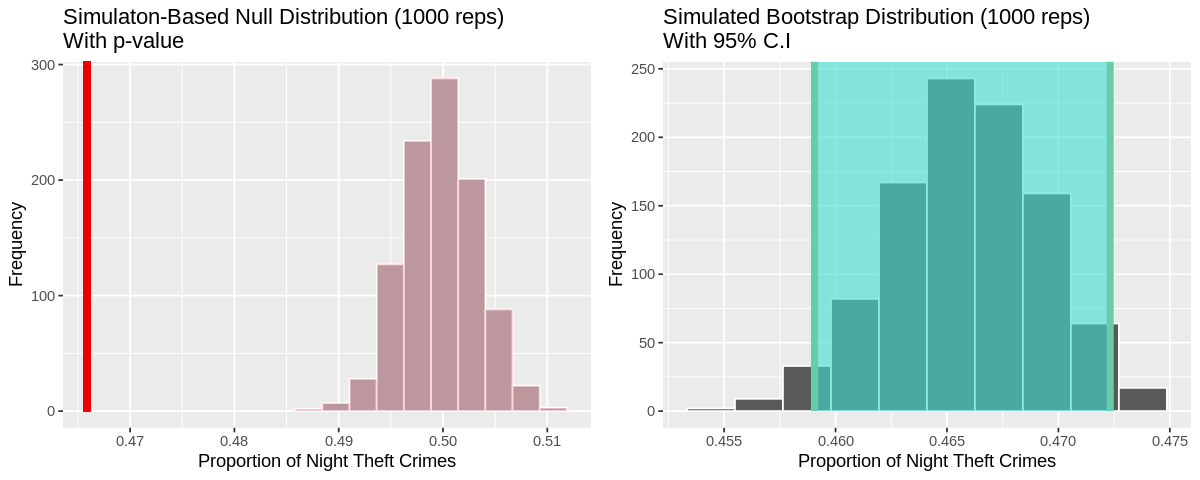

In [19]:
# Graphing the null distribution with its p-value.
null_plot <- 
visualize(null_dist, bins = 10) + 
shade_p_value(obs_stat = obs_prop, direction = "right") +
labs(title = "Simulaton-Based Null Distribution (1000 reps)\nWith p-value", 
         x = "Proportion of Night Theft Crimes",
         y = "Frequency")

# Graphing the bootstrap distribution with its confidence interval.
boot_plot <- 
visualize(boot_dist, bins = 10) +
labs(title = "Simulated Bootstrap Distribution (1000 reps)\nWith 95% C.I", 
         x = "Proportion of Night Theft Crimes",
         y = "Frequency") +
shade_confidence_interval(endpoints = percentile_ci)

options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(null_plot, boot_plot, ncol = 2)

*Figure 2.1. Left. Histogram of the null distribution with its p-value shaded.*

*Figure 2.2 Right. Histogram of the bootstrap distribution with its 95% CI shaded.*

In figure 2.1, the observed statistic appears as a red line and the shaded area indicates the p-value. It can be seen that the entire graph is shaded, which is also indicated by the obtained p-value of 1.0.

In figure 2.2, it can be seen that spread of the bootstrap distribution is quite small. Furthermore, the distribution is centered around 0.465. The confidence interval, shaded in green, encompasses values from 0.459 - 0.472.

In [20]:
# Computing a table to summarize the values obtained from the bootstrap distribution.
boot_est <- data.frame(obs_prop=rep((obs_prop), each=1),
p_val=rep((p_val$p_value), each=1),
lower_ci =rep((percentile_ci$lower_ci), each=1),
upper_ci =rep((percentile_ci$upper_ci), each=1),
sd = rep((sd(boot_dist$stat)), each=1))

boot_est

obs_prop,p_val,lower_ci,upper_ci,sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4658607,1,0.4590549,0.4723227,0.00340963


This means we are 95% confident that the true proportion of theft crime at night falls between 0.4591 and 0.4723 by using simulation-based hypothesis testing. By looking at the standard deviation, 0.0034, we can say it has a very small spread.

*Table 2.4. Table of values obtained from the bootstrap method of analysis.*

#### 2.3. Theory-based method

We will use the z-test for testing proportions to perform the theory-based hypothesis test, this is because the proportion and the variance of proportion are dependent which is not suitable for t-tests.

Let's begin with obtaining the proportion of night theft in the sample:

In [21]:
# The night theft proportion from the sample was previously stored in obs_prop.

obs_prop

[1] 0.4658607

Now using the sample proportion we will calculate the test statistics by using $
Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}}$. Note that our $P_0 = 0.5$.

In [22]:
# Calculating the test statistic using the formula stated
night_test_stat <- (obs_prop - 0.5)/sqrt((0.5)*(1-0.5)/nrow(theft_tidy))
night_test_stat

[1] -9.759541

Using the test statistic calculated, let's find the p-value:

In [23]:
# Using the standard normal distribution to calculate the p-value for our test statistics

night_p_value <- pnorm(night_test_stat,mean = 0, sd = 1, lower.tail = FALSE)
night_p_value

[1] 1

As we can see we get a p-value of 1, but let's visualize what we have been calculating to understand why. 

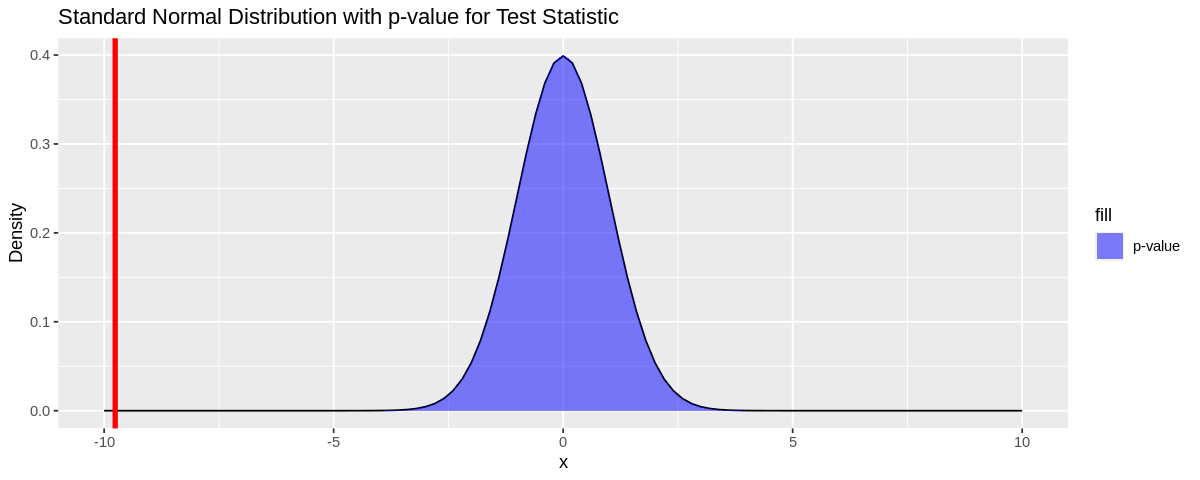

In [24]:
# Graphing the the test statistic and shading the p-value onto a standard normal distribution
x <- seq(-10, 10, by = 0.01)
y <- dnorm(x)
df <- data.frame(x = x, y = y)

test_stat_graph <- ggplot(df, aes(x = x)) +
        stat_function(fun = dnorm) + geom_vline(xintercept = night_test_stat, linetype="solid", 
                color = "red", size=1.5) +
        geom_area(data = subset(df, x >= (night_test_stat)), aes(x = x, y = y, fill = "p-value"), alpha = 0.5) +
        scale_fill_manual(values = c("p-value" = "blue")) +
        labs(title = "Standard Normal Distribution with p-value for Test Statistic",
        x = "x", y = "Density")
test_stat_graph

*Figure 3.1. Standard Normal Distribution with Test Statistic labeled with red line and its p-value shaded.*

By looking at the graph it is clear that our p-value is indeed correct, and that at a 5% significance level, we do not reject the null hypothesis, since $1.0 > 0.05$, meaning that we do not have enough evidence to suggest that the proportion of night theft is more than 0.5. The probability of obtaining a test statistic just as extreme or more extreme than the observed test statistic assuming the null hypothesis (proportion of nighttime thefts is 50%) is true is 100%.

We make sure the CLT is applicable by using $n·p ≥ 10$ and $n(1-p) ≥ 10$:

In [25]:
# Making sure the CLT is applicable through n x p ≥ 10 and n x (1-p) ≥ 10:
nrow(theft_tidy)*obs_prop
nrow(theft_tidy)*(1-obs_prop)

[1] 9518

[1] 10913

We then calculate for a 95% confidence interval. The standard error is calculated using the formula ${SE = \sqrt{p(1-p)/n}}$. 

In [26]:
# Calculating standard error first using the formula.
theft_se = sqrt(obs_prop*(1-obs_prop)/nrow(theft_tidy))
theft_se

[1] 0.00348988

In [27]:
# Calculating the confidence interval.
lower_ci_theory = obs_prop + qnorm(0.025) * theft_se
upper_ci_theory = obs_prop + qnorm(0.975) * theft_se
lower_ci_theory
upper_ci_theory

[1] 0.4590207

[1] 0.4727007

In [28]:
# Computing a table to summarize the values obtained from the z-test.
theory_est <- data.frame(obs_prop=rep((obs_prop), each=1),
t_stat=rep((night_test_stat), each=1),                   
p_val=rep((night_p_value), each=1),
lower_ci =rep((lower_ci_theory), each=1),
upper_ci =rep((upper_ci_theory), each=1),
se = rep((theft_se), each=1))

theory_est

obs_prop,t_stat,p_val,lower_ci,upper_ci,se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4658607,-9.759541,1,0.4590207,0.4727007,0.00348988


This means we are 95% confident that the true proportion of theft crime at night falls between 0.4590 and 0.4727 by using theory-based hypothesis testing. Also, note that the small standard error (0.0035) means that there is a very small spread.

*Table 3.1. Table of values obtained from the z-test.*

#### 2.4. Compilation of data

While a larger dataset size may push us away from bootstrapping due to increased computation time, the functionally large size of this dataset makes both bootstrapping and asymptotic approaches valid for this analysis. This large dataset contributes to why both methods rejected the null hypothesis with a p-value of 1. During the preliminary analysis, we saw that the proportion of day thefts was larger by approximately 10%. This means that both methods would find very limited evidence in favor of the alternative (proportion of night thefts being greater than 0.5) from this dataset.

The bootstrapping method’s computational time was much longer, rendering it less efficient, whereas the theory-based method was much quicker. However, the confidence interval of both methods, albeit extremely similar, the one obtained from the bootstrap method is slightly more narrow. The same happens with the standard errors obtained: both are almost identical but the bootstrapping one is smaller. Lastly, the p-values obtained from both methods are identical: they are both 1.

The slight difference in confidence intervals and standard error is very likely due to the reliance on the assumptions of the z-test. On the other hand, bootstrapping is fully based on the data and it is less reliant on assumptions, making it much relatiely more accurate than theory-based methods.

The results obtained from both methods are fairly similar due to the fact that the assumptions of their corresponding testing method is met. Furthermore, our sample size was fairly big resulting in it converging in similar results for both methods. 

However, despite the similarity in the results obtained from both methods and despite the large computational time of the bootstrap method, bootstrapping is more trustworthy and it is more appropriate than the z-test performed for the reasons specified above.

### 3. Discussion
Due to the p-values being 1.0, we do not have enough evidence to reject the null hypothesis in favour of the alternative at a 5% significance level. In other words, there is not enough evidence to suggest that more than 50% of theft crimes happened at night in Vancouver or cities of similar population density as Vancouver in 2022. This does not mean that more crimes happen during the day, but that there is little evidence from this report to say that citizens should be more worried about thefts occurring at night. Furthermore, we are 95% confident that the true proportion of theft crimes that happen during nighttime lies between 0.459 and 0.472 percent, values which were obtained both from the bootstrap method and the theory-based method. This confidence interval does not contain values greater than 0.5. This further suggests that the true proportion of night thefts is not larger than day thefts. 

Moreover, the standard error obtained from the bootstrap method and the theory-based method are both 0.0034 which is a quite small number and indicates that the spread of the sampling distribution is very small. 

While the results from this analysis are clear, there are a few potential problems with the dataset that may have influenced the results. One issue is that, due to the nature of theft, the victim may not know that the crime occurred until well afterwards. For example, if a bike is stolen at 12 am, the victim may not know until 8 am when they awake. This discrepancy in the data collection may have had significant effects on the data analysis. The designation of setting some hours as "day" and others as "night" might have been problematic as well.

Additionally, due to the literature described in the introduction and our reasoning for theft, the results were not what we expected. The current state of the literature on the happening of crimes claims that more of them happen during nighttime, however, our analysis did not find that. Thus, our initial hypothesis is rejected.

While the results from this analysis conclude that less than 50% of theft crimes happen at night, further research should be done. Future studies should look at finding data that contains the more accurate times for the thefts being committed. It would also be of interest to examine specific types of thefts or types of crimes and see if there is a preference for a specific time of day. Lastly, the focus of such studies could be shifted to cities other than Vancouver.

Overall, we conclude with 95% confidence that less than 50% of thefts happen at night.

### 4. References
Statistics Canada (2023). *Census Profile: 2021 Census of Population*. Statistics Canada Catalogue. https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/index.cfm?Lang=E.

Tompson, L., & Bowers, K. (2013). A Stab in the Dark?: A Research Note on Temporal Patterns of Street Robbery. *The Journal of research in crime and delinquency, 50*(4), 616–631. https://doi.org/10.1177/0022427812469114.

Vancouver Police Department (2023). *Crime Data* [Data set]. The Vancouver Police Department. https://geodash.vpd.ca/opendata/.

Van Koppen, P. J., & Jansen, R. W. J. (1999). The Time to Rob: Variations in Time of Number of Commercial Robberies. *Journal of Research in Crime and Delinquency, 36*(1), 7–29. https://doi.org/10.1177/0022427899036001003.